In [7]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

california_housing = fetch_california_housing()

In [2]:
df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
df['target'] = california_housing.target  # Add target column

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
X = california_housing.data
y = california_housing.target

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model with additional layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # Hidden layer 1 with 64 neurons and ReLU activation
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer 2 with 32 neurons and ReLU activation
    tf.keras.layers.Dense(1, activation=None)  # Output layer with linear activation
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [5]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

Epoch 1/20
413/413 [==============================] - 2s 2ms/step - loss: 0.8658 - val_loss: 0.4895
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4113 - val_loss: 0.4096
Epoch 3/20
413/413 [==============================] - 1s 3ms/step - loss: 0.4089 - val_loss: 0.4047
Epoch 4/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3708 - val_loss: 0.3926
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3450 - val_loss: 0.3735
Epoch 6/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3313 - val_loss: 0.3711
Epoch 7/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3279 - val_loss: 0.3590
Epoch 8/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3184 - val_loss: 0.3596
Epoch 9/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3304 - val_loss: 0.3437
Epoch 10/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3080 - val_loss: 0.3490

129/129 [==============================] - 0s 1ms/step


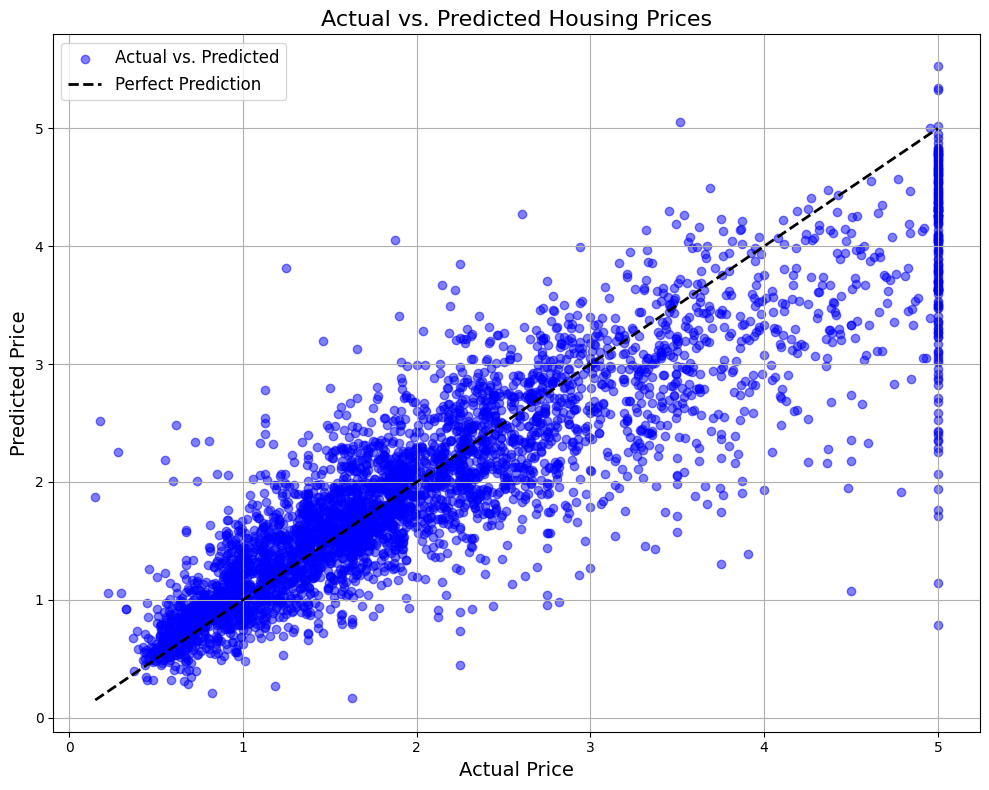

In [8]:
y_pred = model.predict(X_test).flatten()

# Plot actual vs. predicted
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Actual vs. Predicted Housing Prices', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()